**Libraries**

In [1]:
# Data Analysis and Manipulation 
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn works on top of matplotlib
sns.set()                        # this is for styling

# Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import scipy

# Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
# from scipy.cluster.hierarchy import dendrogram, linkage

# We need to save the models, which we'll use in the next section. We'll use pickle for that.
# import pickle

# import warnings
# warnings.filterwarnings('ignore')

**Importing data**

In [31]:
df = pd.read_csv('segmentation data.csv', index_col = 0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


**Exploring the data**

In [32]:
# descriptive statistics about the columns (here, we just look at the data to gain some insight)
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [33]:
#  information about the DataFrame including the index data type and columns, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


We see that there is no missing value in the dataset and all the variables are of same data type (integer).

**Data preprocessing**

A good way to get an initial understanding of the relationship between the different variables is to explore how they *correlate*.

In [34]:
# Compute Pearson correlation coefficient for the features in our data set
# The correlation method in pandas, it has the Pearson correlation set as default
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


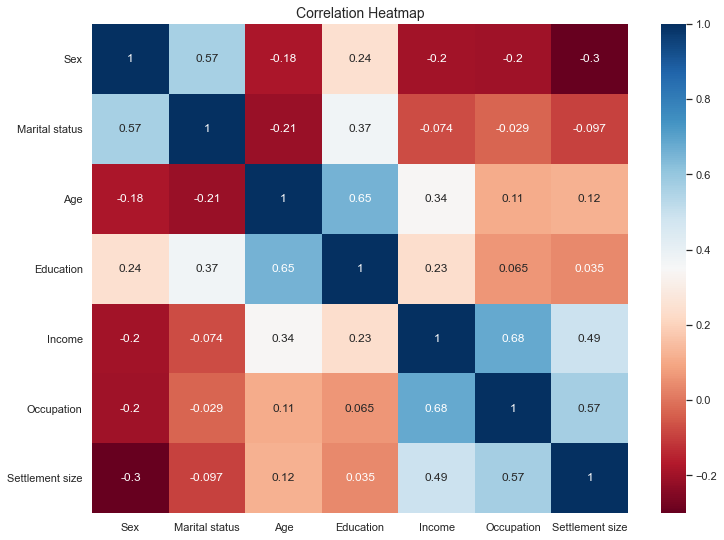

In [35]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap', fontsize=14)
plt.yticks(rotation = 0)
plt.show()

We see that there is a strong correlation between *Education* and *Age*. In other words, older people tend to be more highly educated.<br>
*Income* and *Occupation* correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.

In general, we want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1] or [-1:1].<br>
This process is commonly referred to as *Standardization*.

In [36]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [37]:
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [38]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


**Building Our Segmentation Model**

Before applying the K-Means algorithm we need to choose how many clusters we would like to have.
But How?
There are two components - *Within Clusters Sum of Squares (WCSS)* and *Elbow Method*.

In [39]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations
# In addition we run the algortihm at many different starting points - k means plus plus
# And we set a random state for reproducibility
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

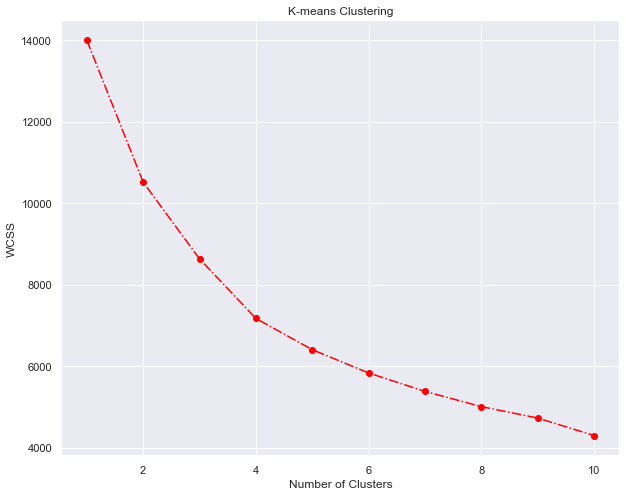

In [40]:
# Plot wcss for the different #clusters
# From this plot we choose the #clusters
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.

In [41]:
# creating K-Means clustering model of 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [42]:
# fitting our model to the dataset (dividing our data into the 4 clusters)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [43]:
# creating a new data frame with the original features and adding a new column with the assigned clusters for each point
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std, columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [44]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [45]:
# Calculating mean values for the CLUSTERS (grouping the customers by clusters and seeing the average values for each variable)
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [46]:
# for labeling the clusters

df_ = df.copy()
df_ = pd.DataFrame(data = df_, columns = df.columns)
df_['Segment K-means'] = kmeans.labels_


df_segm_analysiss = df_.groupby(['Segment K-means']).mean()
df_segm_analysiss.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


Interpreting the dataset:

first segment - 
It has almost the same number of men and women with an average age of 50 
Compared to other clusters, we realize that this is the oldest segment

second segment - 
This segment has the lowest values for the annual salary
They live almost exclusively in small cities
With low income living in small cities, it seems that this is a segment of people with fewer opportunities

third segment - 
This is the youngest segment with an average age of 29. They have medium level of education and average income
They also seem average about every parameter we can label the segment average or standard

fourth segment -
It is comprised almost entirely of men, less than 20 percent of whom are in relationships
Looking at the numbers, we observe relatively low values for education, paired with high values for income and occupation
The majority of this segment lives in big or middle-sized cities

then <br>
Labelling the segments according to their relevance

In [47]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [48]:
# adding the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


c:\users\lokesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


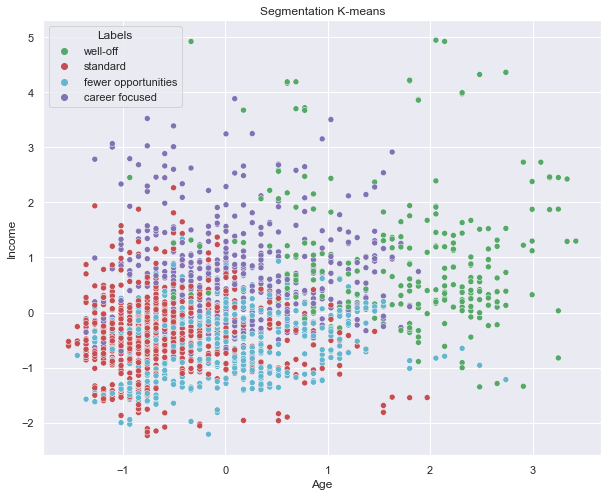

In [49]:
# We plot the results from the K-means algorithm
# Each point in our data set is plotted with the color of the clusters it has been assigned to
# creating a plot to visualize each segment
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

We can see the green segment well off is clearly separated as it is highest in both age and income. But the other three are grouped together.<br>
We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.<br>
In the next section, we will combine PCA and K-Means to try to get a better result.

**PCA with K-Means for Better Visualization**

What we will do here is apply dimensionality reduction to simplify our problem.<br>
We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that We aim to see a nice and clear plot for our segmented groups.

In [50]:
# employing PCA to find a subset of components, which explain the variance in the data
pca = PCA()

In [51]:
df_std = df_std.drop('Segment K-means', 1)
df_std = df_std.drop('Labels', 1)
df_std.head()

<ipython-input-51-8b71a106ae97>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_std = df_std.drop('Segment K-means', 1)
<ipython-input-51-8b71a106ae97>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_std = df_std.drop('Labels', 1)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [52]:
# fitting PCA with our standardized data
pca.fit(df_std)

PCA()

In [53]:
# The attribute shows how much variance is explained by each of the seven individual components 
# ('explained variance ratio' by each component)
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We observe that the first component explains around 36 % of the variability of the data. The second one is 26 % and so on.

Text(0, 0.5, 'Cumulative Explained Variance')

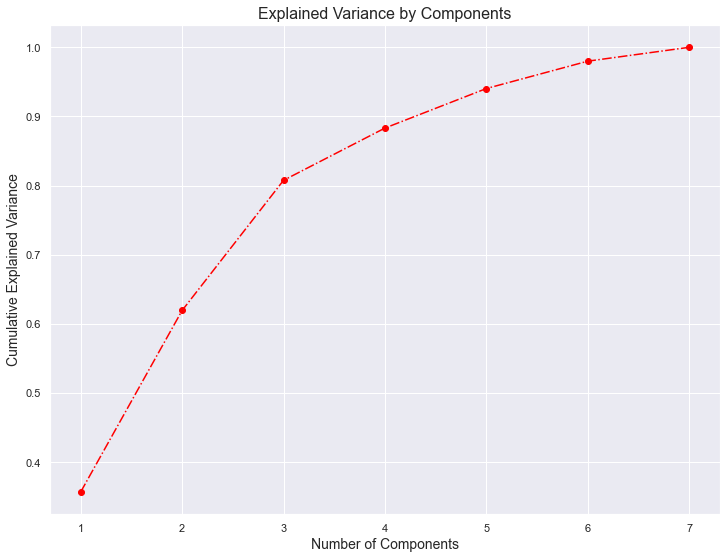

In [54]:
# Plot the cumulative variance explained by total number of components 
# amount of variance of the original data explained by each type of model plotted against the #components
# On this graph we choose the subset of components we want to keep
# Generally, we want to keep around 80 % of the explained variance
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [55]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph
pca = PCA(n_components = 3)

In [56]:
# Fit the model the our data with the selected (3) number of components
pca.fit(df_std)

PCA(n_components=3)

In [57]:
# Here we discucss the results from the PCA
# The components attribute shows the loadings of each component on each of the seven original features
# The loadings are the correlations between the components and the original features
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [60]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['PC 1', 'PCA 2', 'PC 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PC 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
PCA 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
PC 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


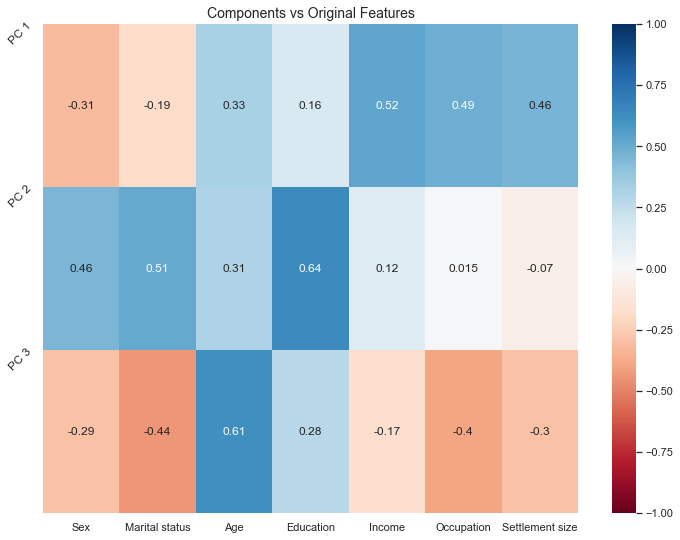

In [61]:
# Heat Map for PCs against original features. Again we use the RdBu color scheme and set borders to -1 and 1
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['PC 1', 'PC 2', 'PC 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

We see that there is a positive correlation between Component 1 and Age,Income, Occupation and Settlement size. These are strictly related to the career of a person. So this component shows the career focus of the individual.<BR>

For the second component Sex, Marital status and Education are by far the most prominent determinants.<BR>
    
For the final component, we realize that Age, Marital Status, and Occupation are the most important features. We observed that marital status and occupation load negatively but are still important.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.<BR>
Let’s transform our data and save it scores_pca.

In [64]:
scores_pca = pca.transform(df_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

**K-means clustering with PCA**<BR>

Our new dataset is ready! It’s time to apply K-Means to our brand new dataset with 3 components.

In [65]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

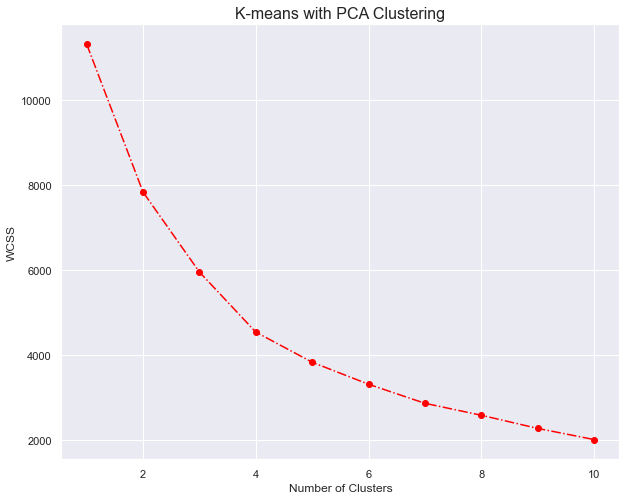

In [66]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [67]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [68]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [83]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['PC 1', 'PC 2', 'PC 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [84]:
# K-Means algorithm has learnt from our new components and created 4 clusters 
# I would like to see old datasets with new components and labels 
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [85]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [86]:
# Calculating the size of each cluster and its proportion to the entire data set
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [87]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


c:\users\lokesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


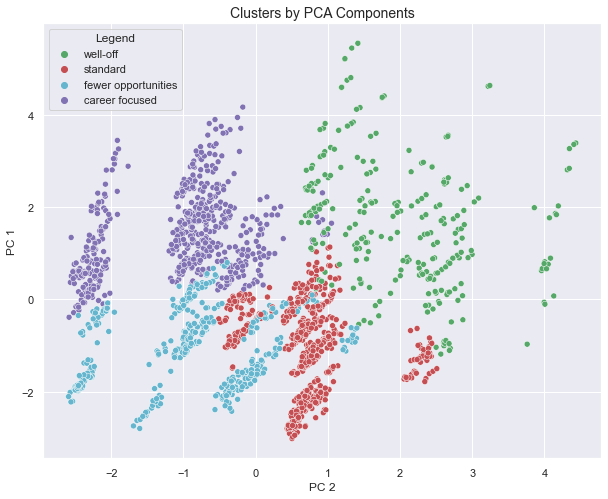

In [88]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['PC 2']
y_axis = df_segm_pca_kmeans['PC 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()

When we plotted the K means clustering solution without PCA, we were only able to distinguish the green segment, but the division based on the components is much more pronounced.<BR>
    
That was one of the biggest goals of PCA to reduce the number of variables by combining them into bigger ones.

*Note*<BR>
We segmented our customers into 4 groups. We are ready to start to choose our groups based on our aims and marketing them!<BR>
Segmentation helps marketers to be more efficient in terms of time, money and other resources.<BR>
They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.